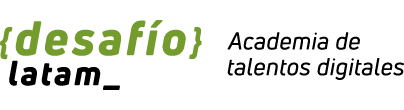

#<center><font color = 'green'>Solución Desafío - Regresión lineal</font></center>

Este conjunto de datos es un registro de las ventas en el mercado de 7 especies comunes de peces diferentes. Con este conjunto de datos, se puede realizar un modelo predictivo utilizando datos adecuados para máquinas y estimar el peso de los peces.

Antes de realizar las actividades pedidas, realizamos una breve exploración de los datos.


In [5]:
#Importamos las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [6]:
#leemos los datos
df=pd.read_csv("Fish.csv")
df.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

In [7]:
df.shape

(159, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [9]:
df.describe()

Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000

In [10]:
df.duplicated().sum()


0

In [11]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

1. Crea una nueva columna que incluya el volumen de pez, asumiéndolo como un cilindro. Para un cilindro con una base circular, el área de la base (A) es igual a πr², donde "r" es el radio de la base del cilindro, y la altura (h) es la distancia entre las dos bases circulares.

In [12]:
df['Volumen']=np.pi*df['Height']*(df['Width']/2)**2
df.head()

Species  Weight  Length1  Length2  Length3   Height   Width     Volumen
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200  146.215854
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056  181.707071
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961  214.391723
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555  198.477454
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340  257.609344

2. Verifica la correlación posible entre las variables, numérica y gráficamente. ¿Aumenta la correlación al añadir el volumen? Explica.

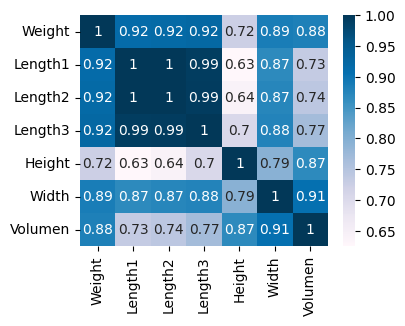

In [13]:
plt.figure(figsize=(4,3))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

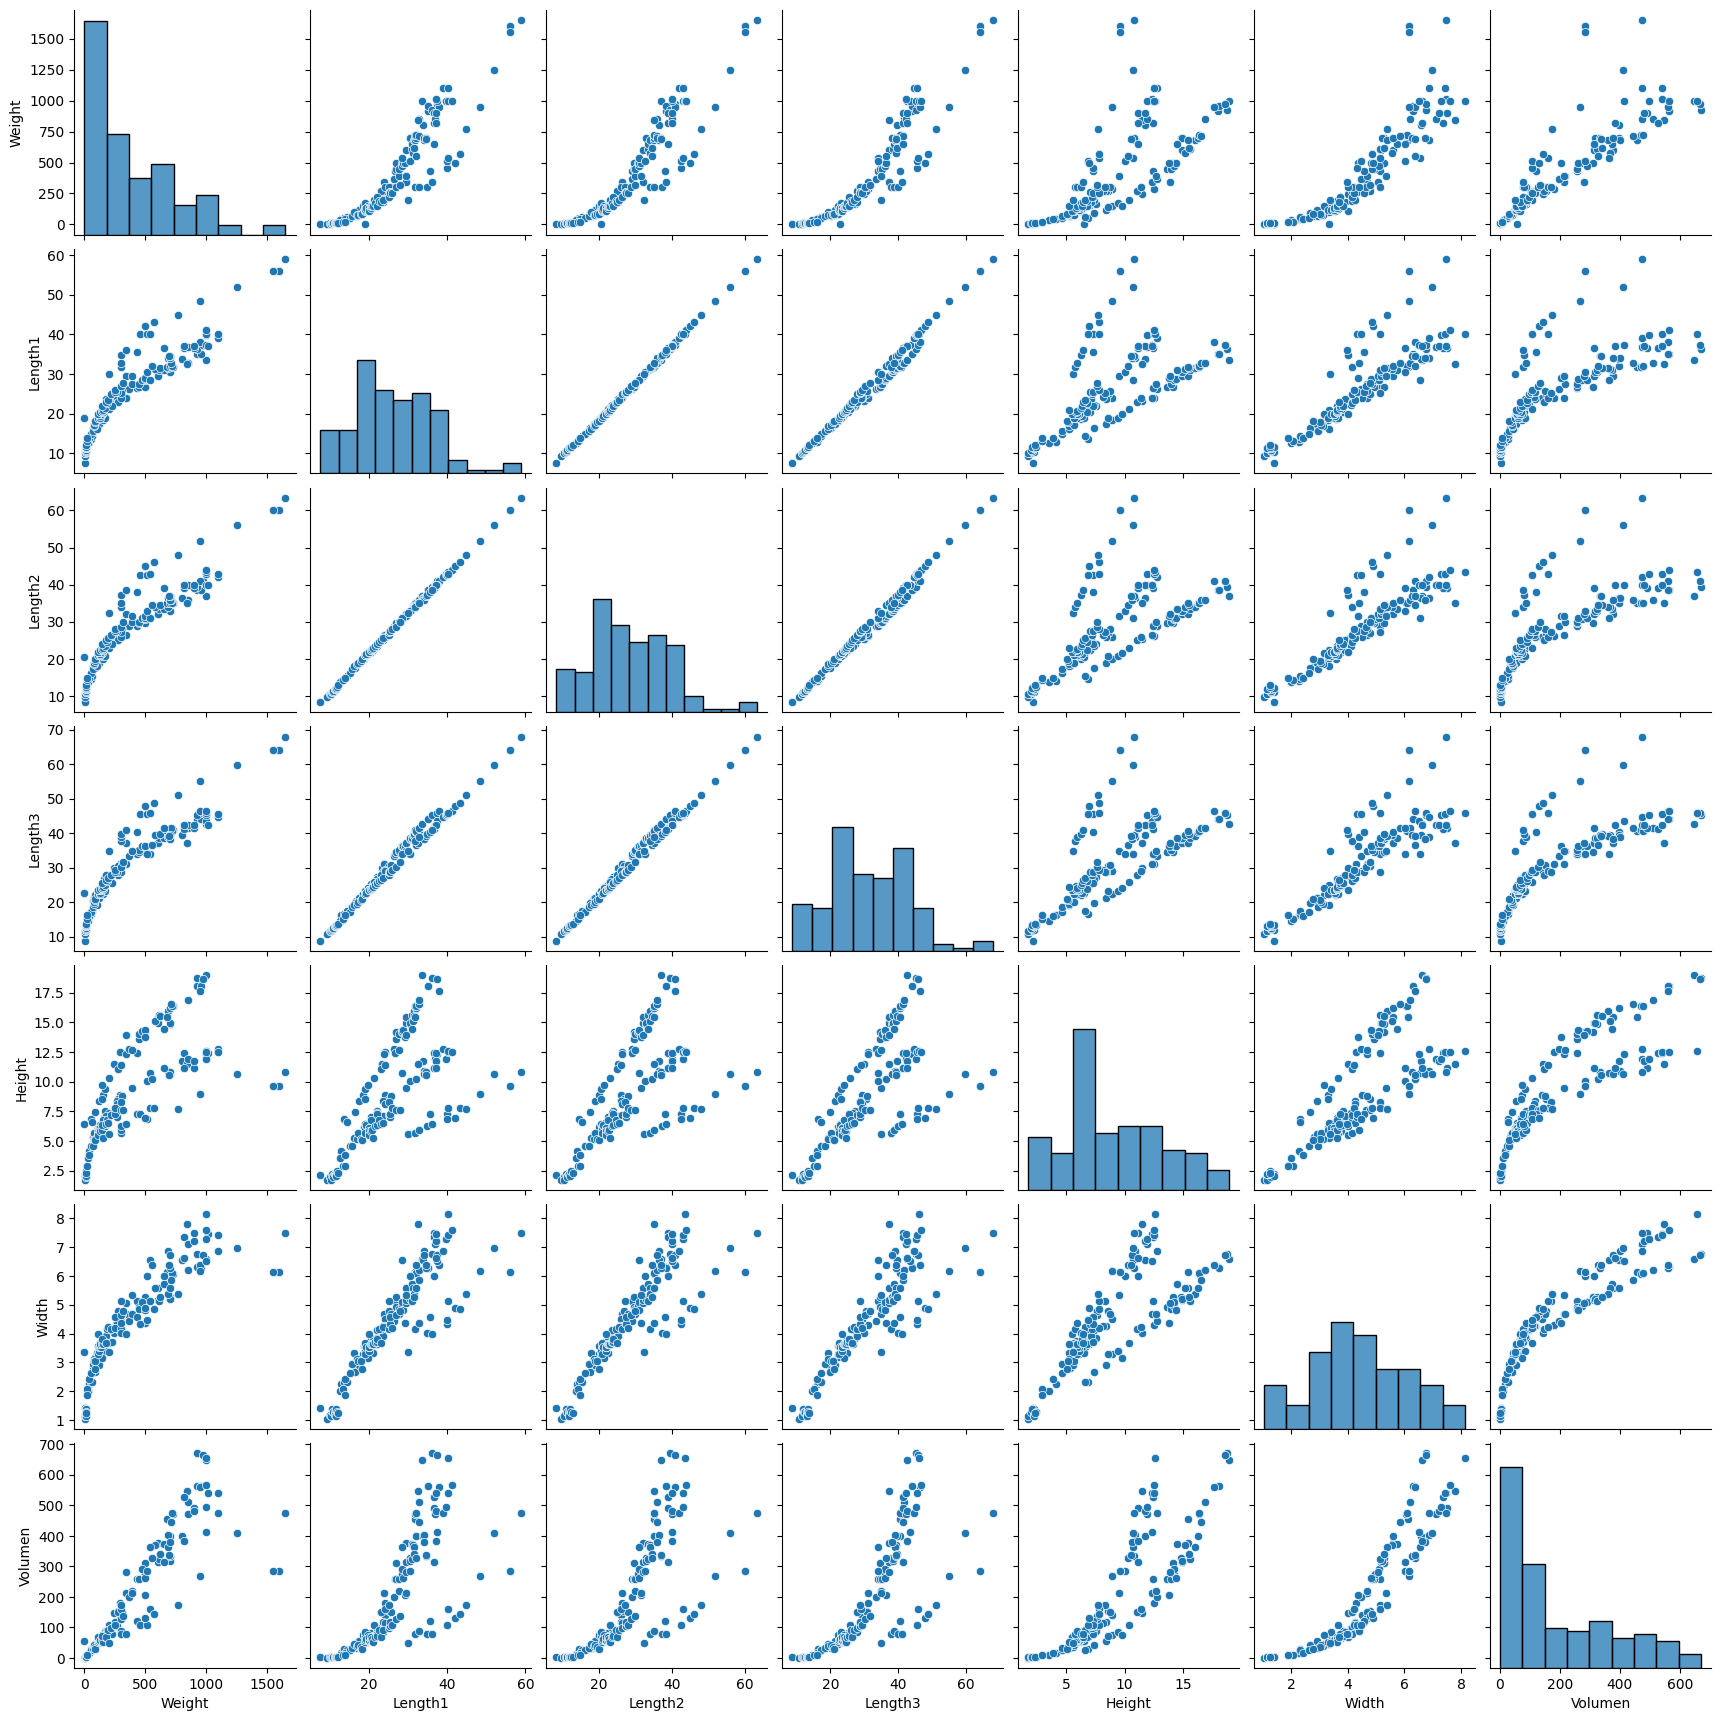

In [14]:
sns.pairplot(df)

Se observa que los coeficientes de correlación para la variable volumen son similares o menores que los demás pares de variables, por lo que no se puede afirmar que la correlación aumente.

Destacan especialmente la correlaciones lineales entre las variables "lenght".

3. Construye un modelo de regresión lineal que relacione el volumen y el peso de los peces. Realiza una breve evaluación del modelo y grafícalo.

Coeficiente de Determinación (R²): 0.78
Error Cuadrático Medio (MSE): 28283.91
Error Cuadrático Medio Explicado (EMSE): 0.22
Error Absoluto Medio (MAE): 90.97


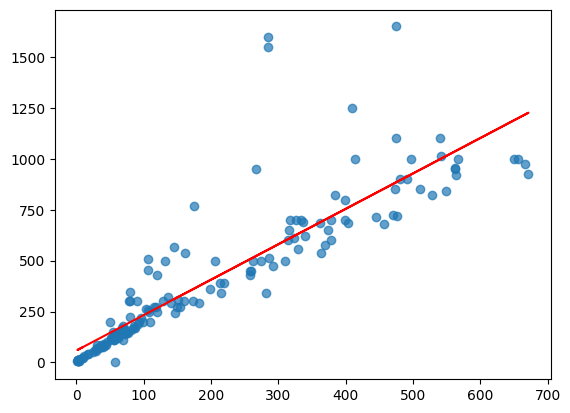

In [46]:
#definiremos una función para realizar regresiones, para mayor comodidad

def regresion(dataframe, variables_independientes, variable_dependiente):
    # Definir las variables predictoras (X) y la variable de respuesta (y)
    X = dataframe[variables_independientes]
    y = dataframe[variable_dependiente]
    # Agregar una constante al predictor (intercepto)
    X = sm.add_constant(X)
    # Crear el modelo de regresión lineal
    model = sm.OLS(y, X).fit()
    # Obtener las predicciones del modelo
    predictions = model.predict(X)
    # Calcular el Error Cuadrático Medio (MSE)
    mse = ((y - predictions) ** 2).mean()
    # Calcular el Error Cuadrático Medio Explicado (EMSE)
    emse = mse / ((y - y.mean()) ** 2).mean()
    # Calcular el Coeficiente de Determinación (R²)
    r_squared = model.rsquared
    # Calcular el Error Absoluto Medio (MAE)
    mae = abs(y - predictions).mean()
     # Preparar el diccionario con las métricas de rendimiento
    metrics_dict = {
        "Coeficiente de Determinación (R²)": r_squared,
        "Error Cuadrático Medio (MSE)": mse,
        "Error Cuadrático Medio Explicado (EMSE)": emse,
        "Error Absoluto Medio (MAE)": mae
    }

    # Devolver el diccionario y el gráfico en una lista
    return [metrics_dict, dataframe[variables_independientes[0]],y,predictions]

results = regresion(df, ["Volumen"], "Weight")
metrics_dict = results[0]

for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.2f}")

A = results[1]
B = results[2]
C = results[3]

# Crear un gráfico de dispersión de los datos reales
plt.scatter(A, B, label="Datos reales", alpha=0.7)

# Crear una línea de regresión utilizando las predicciones del modelo
plt.plot(A, C, color='red', label="Línea de regresión")
plt.show()


Se observa que el valor de R2 es más bien bajo, lo que redunda en un ajuste no tan satisfactorio. Esto se verifica tambuén en los demlás indicadores. Parte del ajuste defectuoso puede deberse a la existencia de datos atípicos.

4. ¿Qué sucede si aplicas el modelo anterior por separado a cada especie de peces? Explica.

In [47]:
especies = pd.unique(df['Species'])

dataframes_filtrados = {}

# Filtrar el DataFrame para cada valor en la lista y considerar solo las columnas "Columna1" y "Columna2"
for valor in especies:
    df_filtrado = df[df['Species'] == valor][['Volumen', 'Weight']]
    dataframes_filtrados[valor] = df_filtrado

for especie in especies:
  print(f'Especie: {especie}')
  results = regresion(dataframes_filtrados[especie], ["Volumen"], "Weight")
  metrics_dict = results[0]
  for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.2f}")
  print('\n')

Especie: Bream
Coeficiente de Determinación (R²): 0.90
Error Cuadrático Medio (MSE): 4348.35
Error Cuadrático Medio Explicado (EMSE): 0.10
Error Absoluto Medio (MAE): 53.69


Especie: Roach
Coeficiente de Determinación (R²): 0.89
Error Cuadrático Medio (MSE): 835.83
Error Cuadrático Medio Explicado (EMSE): 0.11
Error Absoluto Medio (MAE): 16.00


Especie: Whitefish
Coeficiente de Determinación (R²): 0.86
Error Cuadrático Medio (MSE): 11147.58
Error Cuadrático Medio Explicado (EMSE): 0.14
Error Absoluto Medio (MAE): 69.80


Especie: Parkki
Coeficiente de Determinación (R²): 1.00
Error Cuadrático Medio (MSE): 25.59
Error Cuadrático Medio Explicado (EMSE): 0.00
Error Absoluto Medio (MAE): 4.47


Especie: Perch
Coeficiente de Determinación (R²): 0.97
Error Cuadrático Medio (MSE): 3835.98
Error Cuadrático Medio Explicado (EMSE): 0.03
Error Absoluto Medio (MAE): 40.18


Especie: Pike
Coeficiente de Determinación (R²): 0.84
Error Cuadrático Medio (MSE): 36222.43
Error Cuadrático Medio Explica

Se puede observar que los modelos son mejores cuando la regresión se realiza por especie, aumentando el valor de R2 y disminuyendo los erorres. Esto puede deberse a que los datos de una especie interfieren con los valores de otra.

5. Construye un modelo de regresión que relacione dos o más variables con el peso de los peces. Realiza una breve evaluación del modelo.

Los datos escogidos dependerán de los estudiantes. Se da aquí como ejemplo la correlación entre las tres medidas "lenght" y el peso de los peces.

In [49]:
results=regresion(df, ["Length1","Length2","Length3"], "Weight")

metrics_dict = results[0]

for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.2f}")


Coeficiente de Determinación (R²): 0.85
Error Cuadrático Medio (MSE): 18617.33
Error Cuadrático Medio Explicado (EMSE): 0.15
Error Absoluto Medio (MAE): 107.00


Se observa un modelo con un ajuste aceptable, basado en un valor de R2 bastante alto. En este caso el gráfico no nos ayuda mucho ya que se trata de una regresión de varias variables y deberíamos considerar una representacion tridimensional.